# Telco Customer Churn

In [1]:
%%time
# Import Standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

CPU times: total: 2.91 s
Wall time: 5.2 s


In [2]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.shape

(7043, 21)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# Group by gender
gender_group = df.groupby('gender').size()
gender_group

gender
Female    3488
Male      3555
dtype: int64

In [10]:
# Group by SeniorCitizen
senior_group = df.groupby('SeniorCitizen').size()
senior_group

SeniorCitizen
0    5901
1    1142
dtype: int64

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
df.Dependents.unique()

array(['No', 'Yes'], dtype=object)

# DEMEGRAPHIC

	Which 2 demographics proved to be the most popular with the telco brand?
    If the marketing team wanted to increase customer retention, to whom should they focus their advertisements on?

In [ ]:
churn_no = df[df['Churn'] == 'No']
churn_yes = df[df['Churn'] == 'Yes']

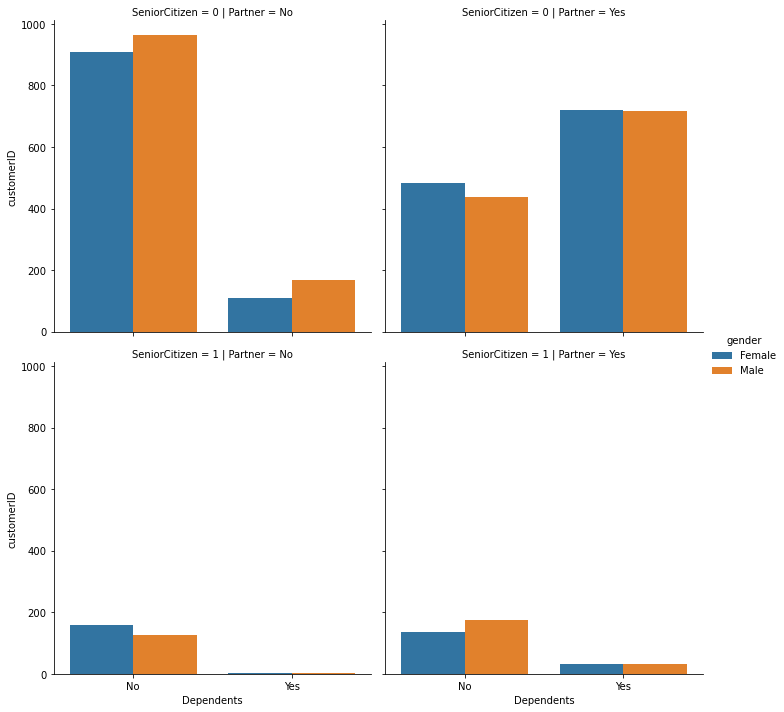

In [18]:
demo_no = churn_no.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])['customerID'].count().reset_index()
sns.catplot(data = demo_no, x = 'Dependents', y = 'customerID', row = 'SeniorCitizen', col = 'Partner',  hue = 'gender', kind = 'bar')

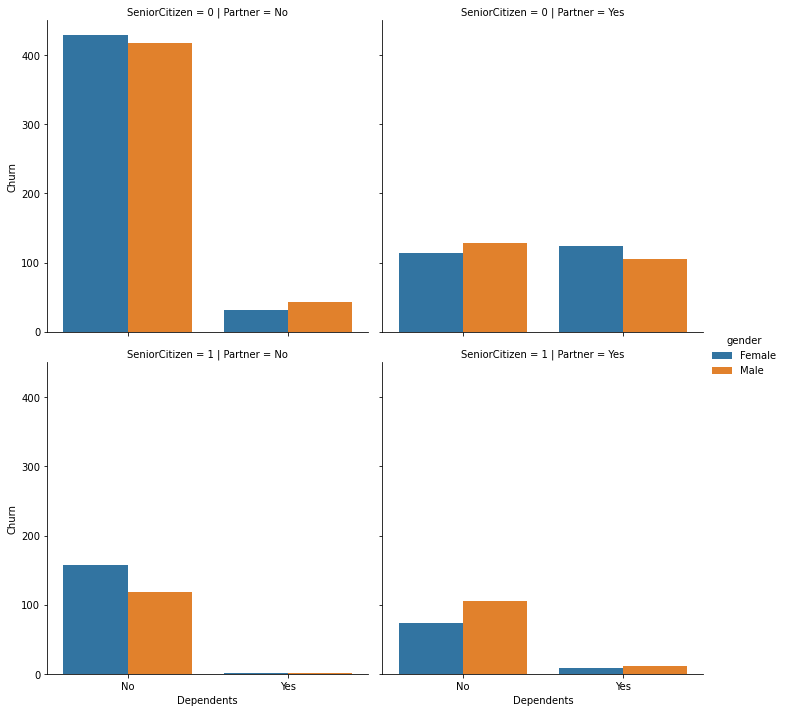

In [19]:
demo_yes = churn_yes.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])['Churn'].count().reset_index()
sns.catplot(data = demo_yes, x = 'Dependents', y = 'Churn', row = 'SeniorCitizen', col = 'Partner',  hue = 'gender', kind = 'bar')

Both single, young to mid aged, men and women without dependents are the most popular with the telco brand. Yet, they are the majority of those churning. Therefore, the telco brand should target these two demographics in their marketing adverts.

Services:
a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)

b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

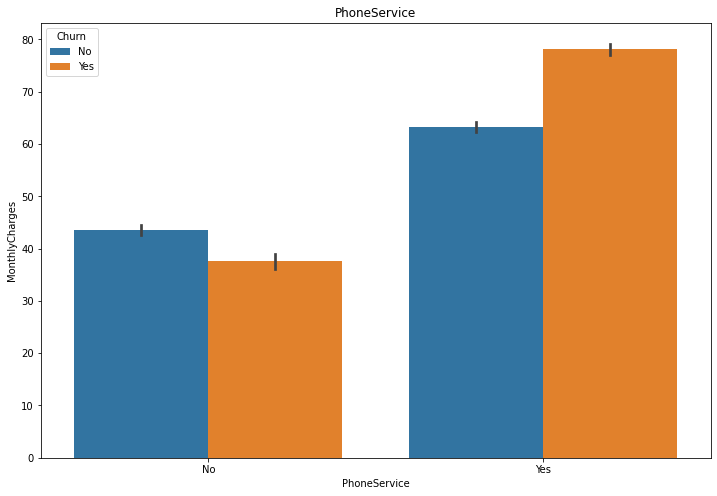

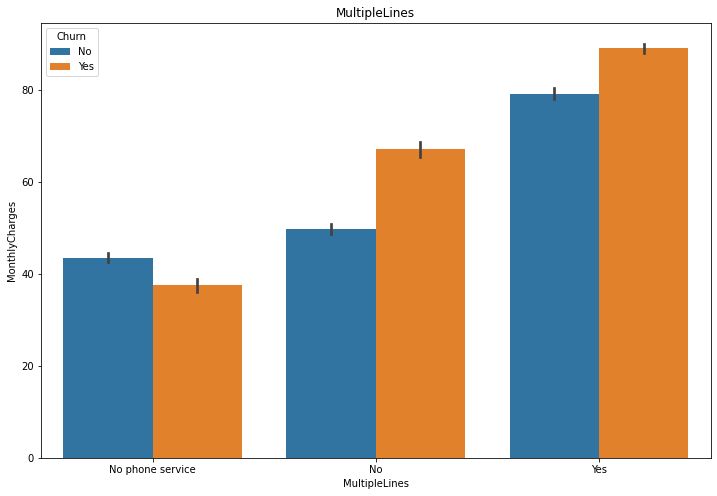

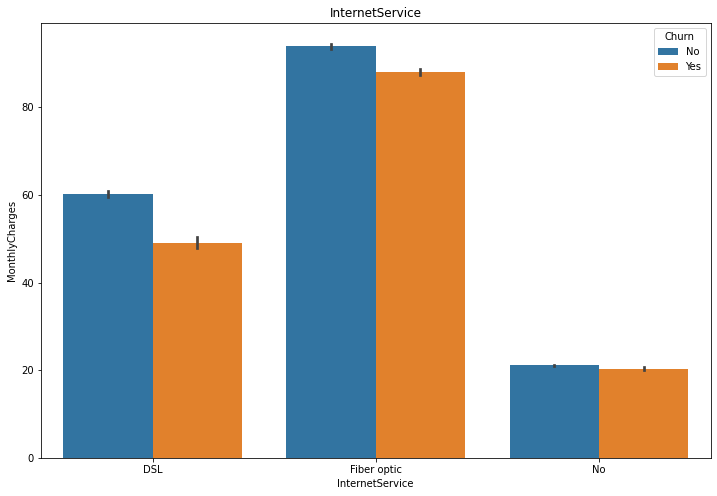

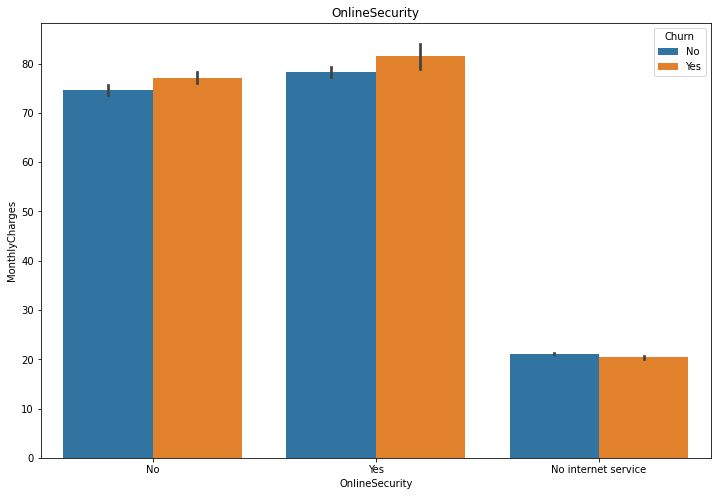

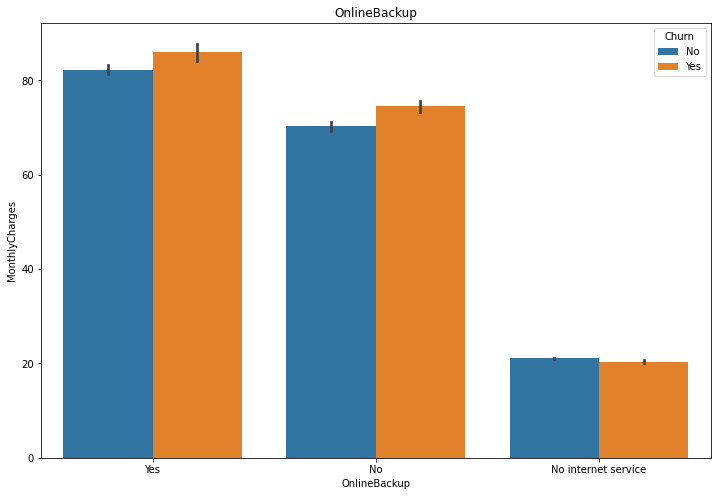

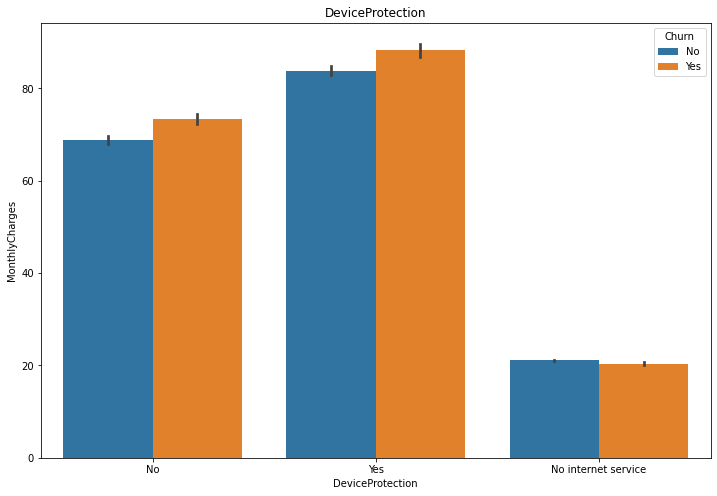

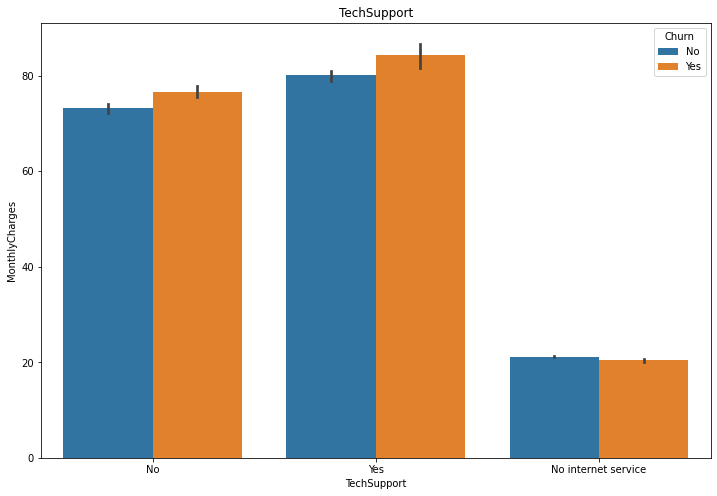

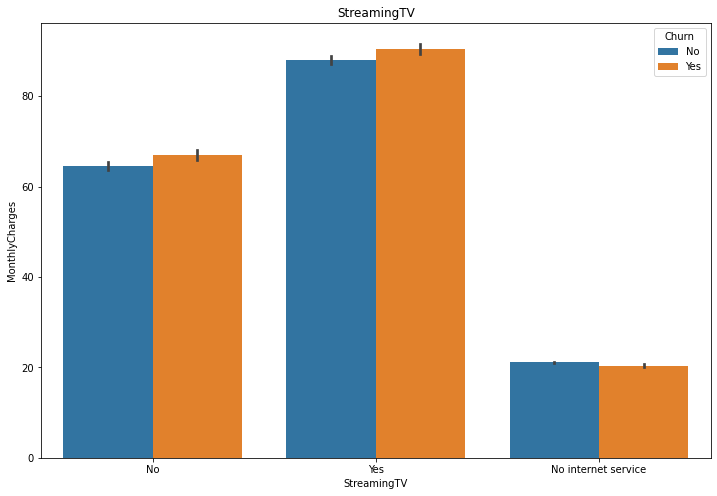

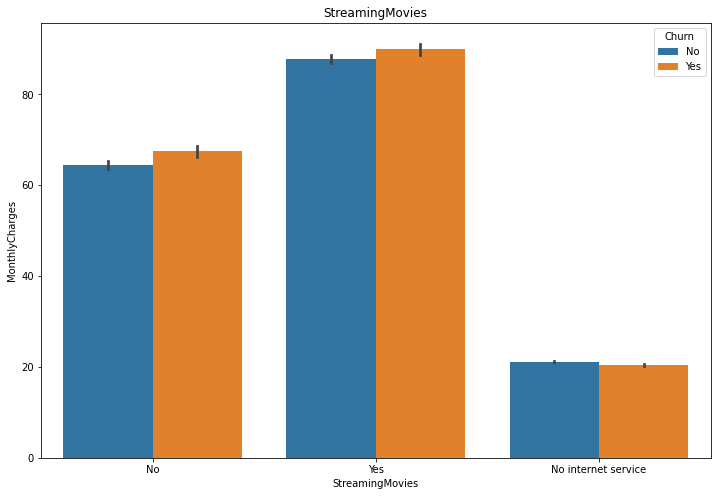

In [20]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


for service in services:
    plt.figure(figsize = (12, 8))
    sns.barplot(x = service, y = 'MonthlyCharges', data = df, hue = 'Churn')
    plt.title(service)
    plt.show()

All services seem to be contibuting to a high monthly charge hence the customers churning apart from those connected to a fibre optic and DSL internet service.

In [22]:
phone_service = df[df['PhoneService'] == 'Yes']

<AxesSubplot:xlabel='Contract', ylabel='count'>

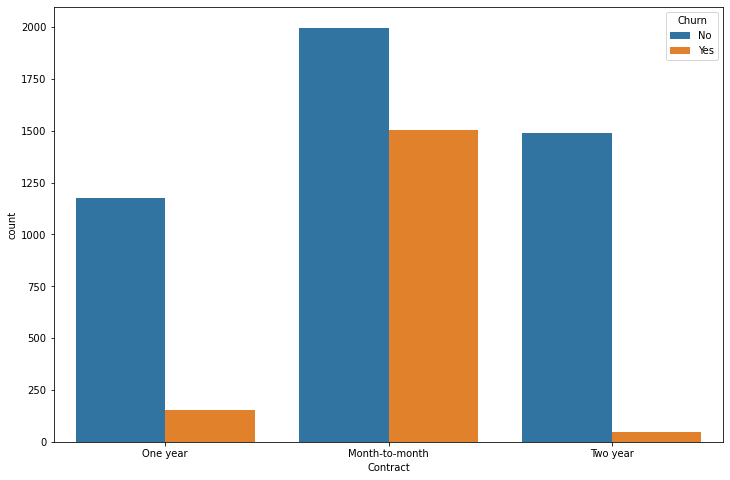

In [23]:
plt.figure(figsize = (12, 8))
sns.countplot(data = phone_service, x = 'Contract', hue = 'Churn')

Advocating for a Two year contract for provision of phone service only would be the best because its less prone to having clientele leaving the brand even though it is not the most popular option.

Payment: (Use visualization in explaining your analysis)
a.	If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:

    i.	Basic

    ii.	Plus

    iii. Premium

df_anomaly['Info_Diff'].isin(df_normal['Info_Diff'])
Concat

Merge

Join

#df_anomaly - df1
#df_normal - df2
#Info_Diff - similar columns

pd.merge(df_anomaly, df_normal, how = 'outer')




df_anomaly[df_anomaly['Info_Diff'].isin(df_normal['Info_Diff'])]

<Figure size 864x576 with 0 Axes>

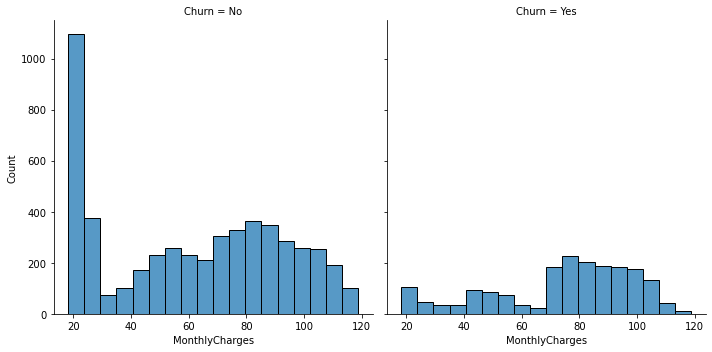

In [27]:
plt.figure(figsize = (12, 8))
sns.displot(data = df, x = 'MonthlyCharges', col = 'Churn')

Most customers at the are more willing to pay USD 20, 60 and 80. Therefore, the ideal bouque distribution would be:

    i.	Basic - $20

    ii.	Plus - $65

    iii. Premium - $80

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

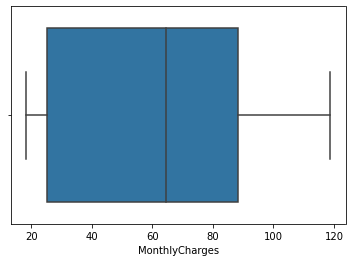

In [28]:
sns.boxplot(churn_no['MonthlyCharges'])

In [29]:
churn_no['MonthlyCharges'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

Alternatively, we could use the quatile distribution of the values to identify the package prices for the three boquets as below:

    i.	Basic - $25

    ii.	Plus - $64

    iii. Premium - $88

In [30]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

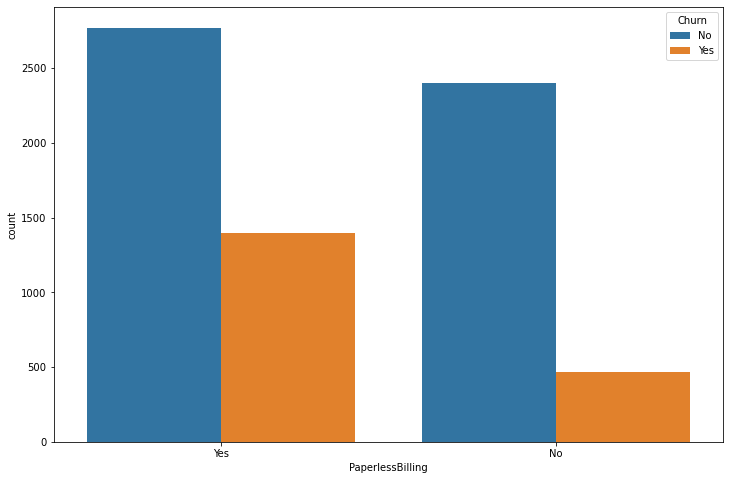

In [31]:
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = 'PaperlessBilling', hue = 'Churn')

Majority of customers seem to be sticking with the telco brand and using paperless payment. Howerver, a lager potion of the customers who are shifting to another telco brand also use paperless and opposed to those who do not. Therefore, it is wise for the company not to go fully paperless with the aim of reducing their customers churning.